In [3]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
import time

## import self-written packages 
from nfdr2.util import *
import nfdr2.method as md
import nfdr2.data_loader as dl

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
p, h, x = dl.load_pasilla()

In [18]:
p

array([0.802 , 0.9258, 0.819 , ..., 0.9863, 0.8786, 0.6016])

In [169]:
p,x,h,n_full,cate_name = dl.load_2d_bump_slope(n_sample=20000)
alpha=0.1
## report the baseline   
n_rej,t_rej=md.bh(p,alpha=alpha,n_full=n_full,verbose=False)
print('## BH, n_rej=%d, t_rej=%0.5f'%(n_rej,t_rej))
n_rej,t_rej,pi0_hat=md.storey_bh(p,alpha=alpha,n_full=n_full,verbose=False)
print('## SBH, n_rej=%d, t_rej=%0.5f'%(n_rej,t_rej))

## BH, n_rej=624, t_rej=0.00312
## pi0_hat=0.908
## SBH, n_rej=657, t_rej=0.00359


# Num of alternatives: 2017
# Num of discovery: 796
# Num of true discovery: 715
# Actual FDP: 0.102



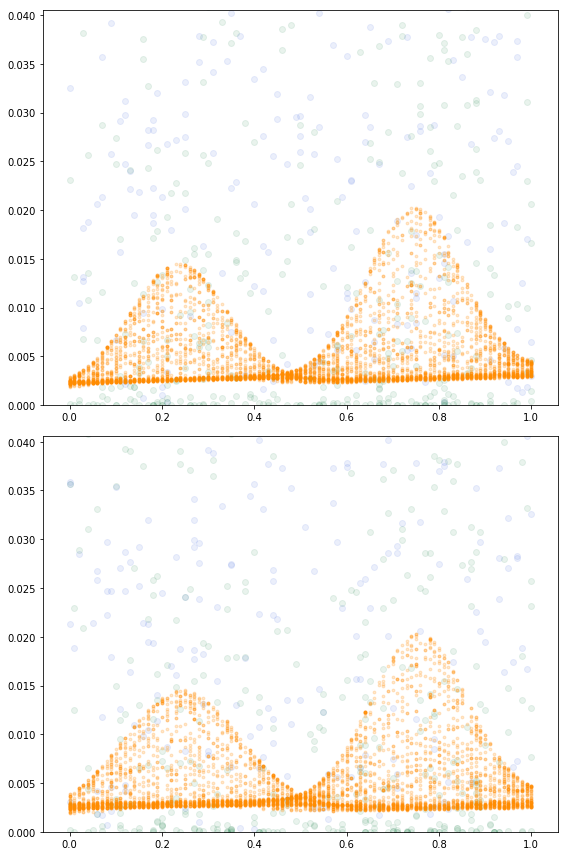

In [172]:
p,x,h,n_full,cate_name = dl.load_2d_bump_slope(n_sample=20000)
output_folder = './results'
f_write = open('./results/debug.txt','w')
a,mu,sigma,w = md.method_init(p,x,2,alpha=0.1,n_full=n_full,h=h,verbose=True,output_folder=output_folder,\
                 random_state=0,fold_number=0,f_write=f_write)
f_write.close()

# Num of discovery: 798

# Num of discovery: 868
# Num of alternatives: 2017
# Num of true discovery: 768
# Actual FDP: 0.115



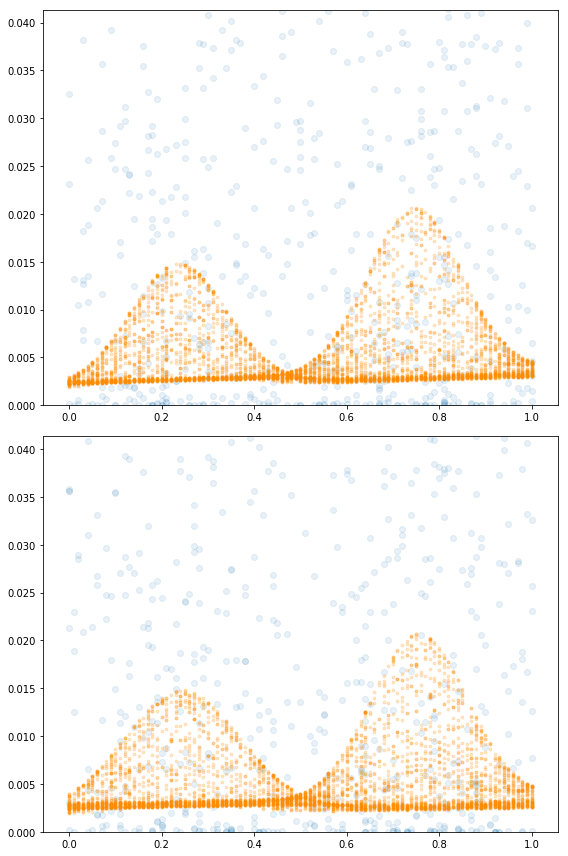

In [206]:
p,x,h,n_full,cate_name = dl.load_2d_bump_slope(n_sample=20000)
output_folder = './results'
f_write = open('./results/debug.txt','w')
n_rej, t, theta = md.method_single_fold(p,x,2,alpha=0.1,n_full=n_full,n_itr=100,h=h,verbose=True,\
            output_folder=output_folder,fold_number=0,random_state=0,f_write=f_write)
f_write.close()

## method_init_1
# Num of discovery: 417


## method_single_fold_1
# Num of discovery: 447


## method_single_fold_wrapper_1
# Num of discovery: 338


## method_init_2
# Num of discovery: 355


## method_single_fold_2
# Num of discovery: 400


## method_single_fold_wrapper_2
# Num of discovery: 415


# total rejection: 753 [338, 415]
# D=753, FD=79, FDP=0.105
#time total: 10.9875s
n_rej: 753
FDP: 0.1049136786188579


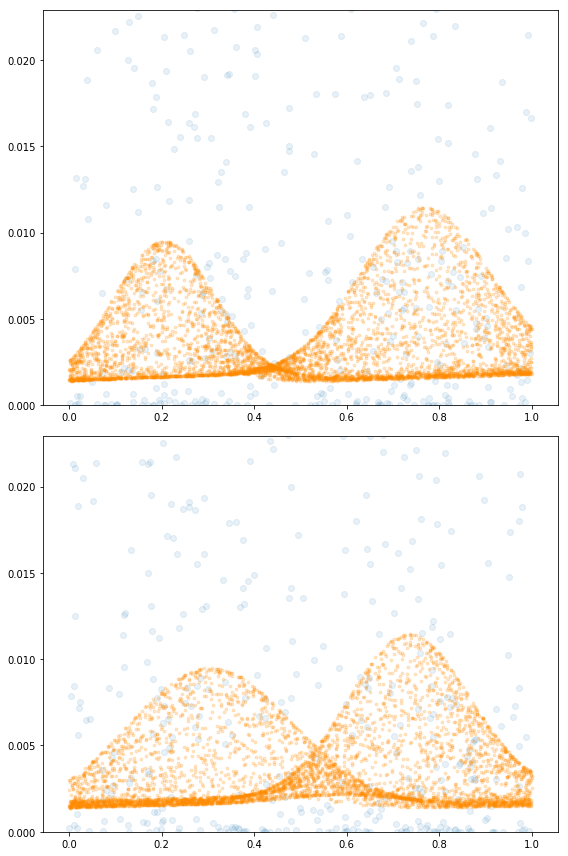

In [228]:
p, x, h, n_full, _ = dl.load_2d_bump_slope(n_sample=20000)
n_rej,t,_=md.method_hs(p,x,2,alpha=alpha,h=h,n_full=n_full,n_itr=50,verbose=True,\
                                output_folder='./results',random_state=0, single_core=True)
FDP = np.sum((p < t)*(h == 0))/np.sum(p<t)
print('n_rej:', np.sum(p<t))
# assert n_rej > 800
print('FDP:', FDP)
# assert FDP < 0.15

In [286]:
start_time = time.time()
p, x, n_full, cate_name = dl.load_gtex_Artery_Aorta()
print(time.time() - start_time)

260.69350600242615


In [288]:
p_sub = p[0:50000]
x_sub = x[0:50000, :]
n_full_sub = n_full

In [289]:
import pickle
fname = '/data3/martin/gtex_data/GTEx_Analysis_v7_eQTL_all_associations/GTEx_small.pickle'
with open(fname, 'wb') as handle:
    pickle.dump(p_sub, handle, protocol=pickle.HIGHEST_PROTOCOL)
    pickle.dump(x_sub, handle, protocol=pickle.HIGHEST_PROTOCOL)
    pickle.dump(n_full_sub, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
p, x, n_full, cate_name = dl.load_GTEx_small()

In [294]:
p[0:5]

array([0.0032, 0.005 , 0.0076, 0.9954, 0.9967])

In [295]:
p_sub[0:5]

array([0.0032, 0.005 , 0.0076, 0.9954, 0.9967])

In [274]:
from sklearn.preprocessing import Imputer
# data loader
fpath = '/data3/martin/gtex_data/GTEx_Analysis_v7_eQTL_all_associations'
fname = 'Adipose_Subcutaneous.allpairs.txt.processed.filtered'
fname = fpath + '/' + fname
fname = 'toy_gtex'
data = np.loadtxt(fname, dtype=str, delimiter=', ')
hypothesis_name = data[:, 0]
p = data[:, -1].astype(dtype = float)
x = data[:, 1:5].astype(dtype = float)
ind_nan = np.isnan(x[:, 1])
x[ind_nan, 1] = np.mean(x[~ind_nan, 1])

In [296]:
help(parser.add_argument)

NameError: name 'parser' is not defined

In [297]:
p, x, n_full, cate_name =  eval('dl.load_GTEx_small()')

In [298]:
p

array([0.0032, 0.005 , 0.0076, ..., 0.    , 0.0089, 0.0055])